In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
regions=pd.read_csv('/content/noc_regions.csv')
athletes=pd.read_csv('/content/athlete_events.csv')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
#join both dataset
athletes_df=athletes.merge(regions,how= 'left', on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
athletes_df.shape

(271116, 17)

In [ ]:
#column name consistant
athletes_df.rename(columns={'region':'Region','notes':'Notes'}, inplace= True)

In [ ]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41318 entries, 0 to 41317
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      41318 non-null  int64  
 1   Name    41318 non-null  object 
 2   Sex     41318 non-null  object 
 3   Age     39816 non-null  float64
 4   Height  31987 non-null  object 
 5   Weight  31515 non-null  float64
 6   Team    41317 non-null  object 
 7   NOC     41317 non-null  object 
 8   Games   41317 non-null  object 
 9   Year    41317 non-null  float64
 10  Season  41317 non-null  object 
 11  City    41317 non-null  object 
 12  Sport   41317 non-null  object 
 13  Event   41317 non-null  object 
 14  Medal   5598 non-null   object 
 15  Region  41273 non-null  object 
 16  Notes   772 non-null    object 
dtypes: float64(3), int64(1), object(13)
memory usage: 5.7+ MB


In [ ]:
athletes_df.describe()

,ID,Age,Weight,Year
count,41318.000000,39816.000000,31515.000000,41317.000000
mean,10813.488649,25.505651,70.785023,1978.645691
std,6048.087706,6.333934,14.272832,29.590765
min,1.000000,12.000000,25.000000,1896.000000
25%,5657.250000,21.000000,61.000000,1960.000000
50%,10906.000000,24.000000,70.000000,1988.000000
75%,15957.000000,28.000000,79.000000,2002.000000
max,21310.000000,84.000000,214.000000,2016.000000


In [ ]:
#check null values
nan_values=athletes_df.isna()
nan_columns=nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team       True
NOC        True
Games      True
Year       True
Season     True
City       True
Sport      True
Event      True
Medal      True
Region     True
Notes      True
dtype: bool

In [ ]:
athletes_df.isnull().sum()

ID            0
Name          0
Sex           0
Age        1502
Height     9331
Weight     9803
Team          1
NOC           1
Games         1
Year          1
Season        1
City          1
Sport         1
Event         1
Medal     35720
Region       45
Notes     40546
dtype: int64

In [ ]:
#Q. Print the columns names containig null values or missung values in the form of a list


In [ ]:
#india details
athletes_df.query('Team == "India"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928.0,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928.0,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167,53.0,India,IND,1984 Summer,1984.0,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167,53.0,India,IND,1984 Summer,1984.0,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167,53.0,India,IND,1988 Summer,1988.0,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [ ]:
athletes_df.query('Team == "Japan"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
625,362,Isao Ko Abe,M,24.0,177,75.0,Japan,JPN,1936 Summer,1936.0,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178,67.0,Japan,JPN,1976 Winter,1976.0,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166,69.0,Japan,JPN,1960 Summer,1960.0,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168,68.0,Japan,JPN,1992 Summer,1992.0,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167,62.0,Japan,JPN,1972 Summer,1972.0,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [ ]:
#top countries participated
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<Axes: title={'center': 'Overall participation by country'}, ylabel='Team'>

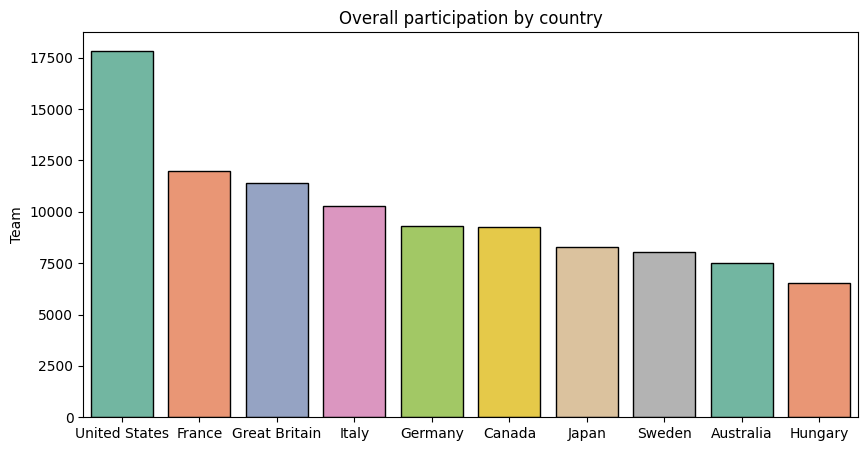

In [ ]:
#plot for top 10 countries
plt.figure(figsize=(10,5))
plt.title('Overall participation by country')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='Set2', linewidth=1,edgecolor='Black')

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10., 12., 14., 16., 18., 20., 22., 24., 26., 28., 30., 32., 34.,
        36., 38., 40., 42., 44., 46., 48., 50., 52., 54., 56., 58., 60.,
        62., 64., 66., 68., 70., 72., 74., 76., 78.]),
 <BarContainer object of 34 artists>)

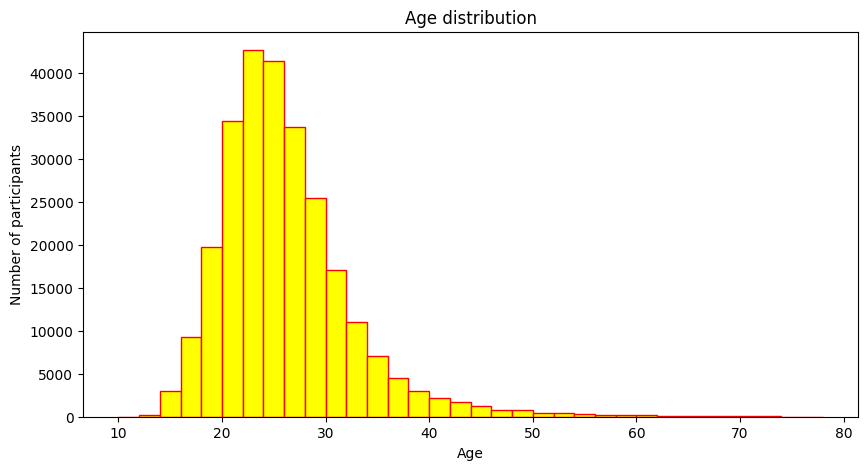

In [ ]:
#Age distribution of athletes
plt.figure(figsize=(10,5))
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(athletes_df.Age, bins=np.arange(10,80,2), color='Yellow', edgecolor='red')

In [ ]:
winter_sports=athletes_df[athletes_df.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [ ]:
summer_sports=athletes_df[athletes_df.Season=='Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [ ]:
#male female participants
gender_counts=athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

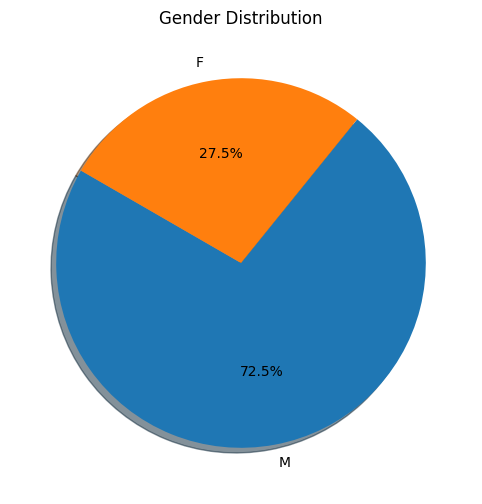

In [ ]:
#pie plot for male and female athletes
plt.figure(figsize=(10,6))
plt.title("Gender Distribution")
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=150,shadow=True);

In [ ]:
#Total medals
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [ ]:
#Total no. of female athletes in each olympic
female_participants=athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')][['Sex','Year']]
female_participants=female_participants.groupby('Year').count().reset_index()
female_participants.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


Text(0.5, 1.0, 'Women participation')

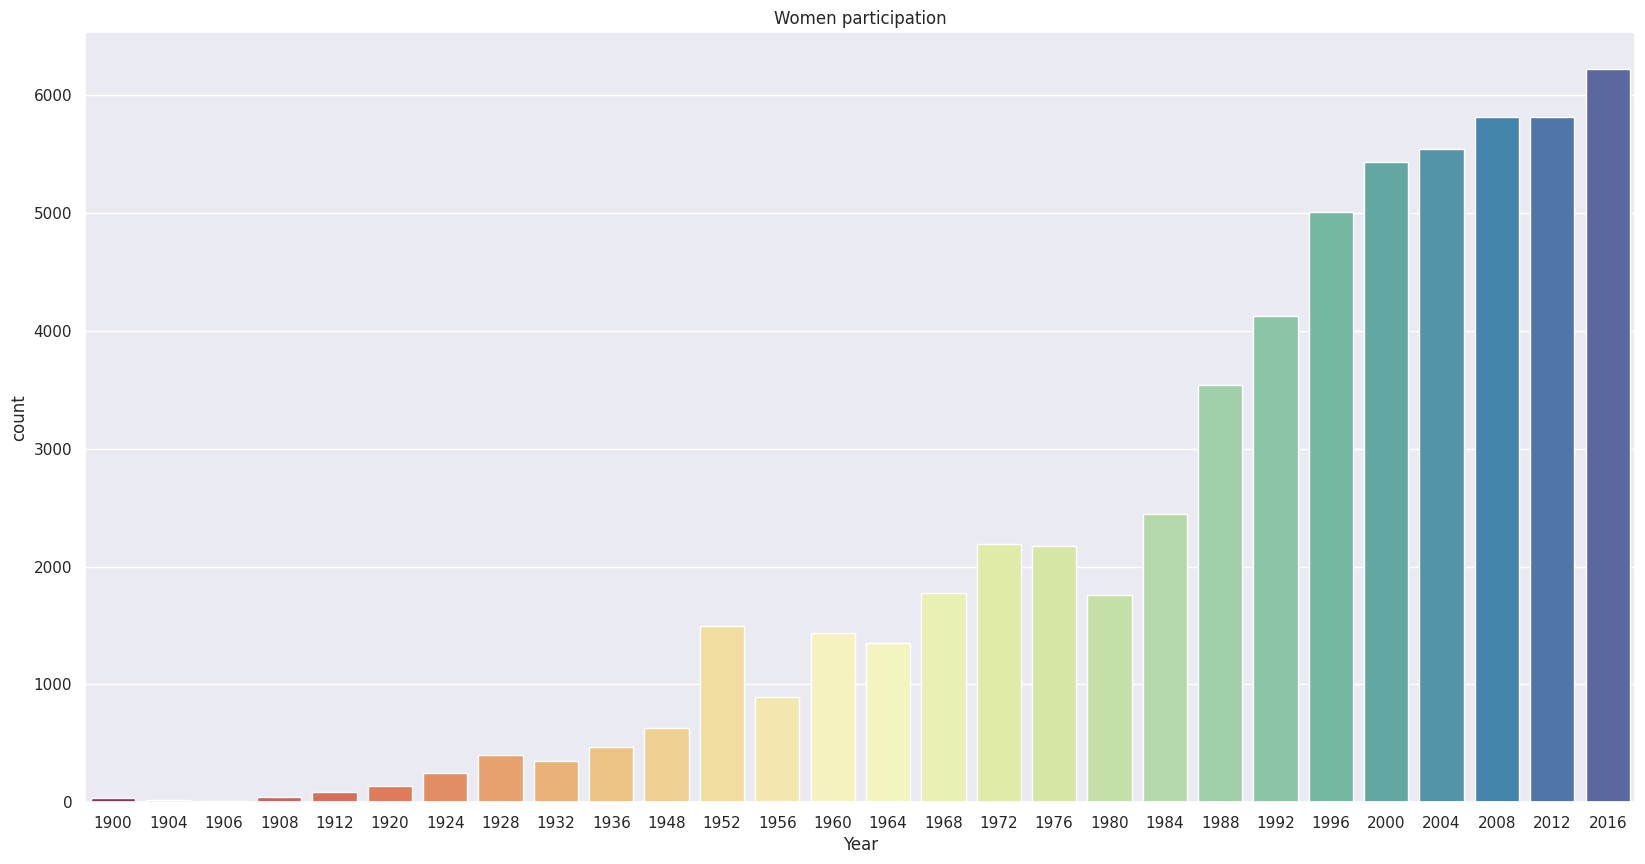

In [ ]:
womenOlympics=athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')]
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=womenOlympics, palette="Spectral")
plt.title("Women participation")

<Axes: title={'center': 'Plot of female athletes over time'}, xlabel='Year'>

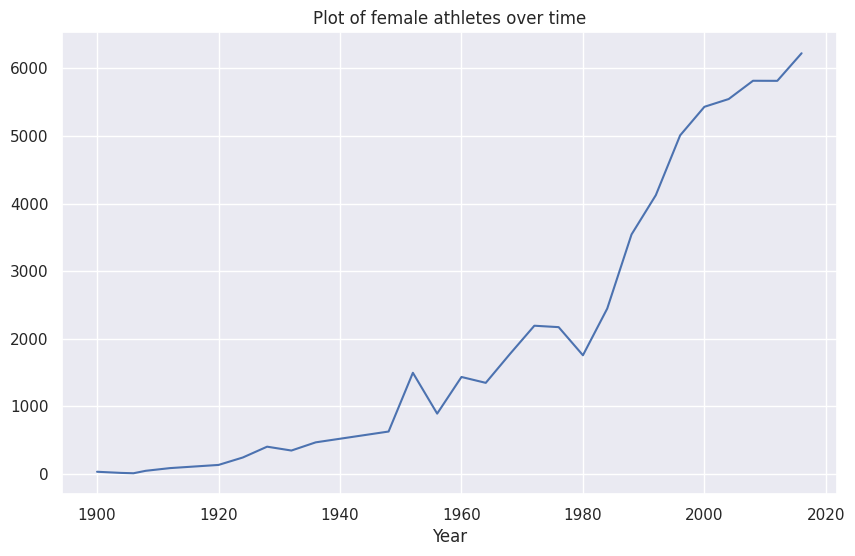

In [ ]:
part=womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(10,6))
plt.title("Plot of female athletes over time")
part.loc[:,'F'].plot()


In [ ]:
#gold medals athletes
goldmedals=athletes_df[(athletes_df.Medal == 'Gold')]
goldmedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [ ]:
#take only values different from NaN
goldmedals= goldmedals[np.isfinite(goldmedals['Age'])]

In [ ]:
#gold beyond 60
goldmedals['ID'][goldmedals['Age']>60].count()

6

In [ ]:
sporting_event= goldmedals['Sport'][goldmedals['Age']>60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

In [ ]:
#plot for sporting_event
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(data= sporting_event)
plt.title("Gold medal for athletes over 60 years")

KeyError: ignored

<Figure size 1000x500 with 0 Axes>